# Student Markov Decision Process

In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

import sys
if "./" not in sys.path:
    sys.path.append("./")
from discrete_limit_env import StudentEnv

%matplotlib inline

## Create an agent that chooses an action randomly in each state

In [2]:
class RandomAgent(object):
    """Random agent"""
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()[observation]

## Sample `episode_count` number of episodes from the MDP

In [3]:
def sample_mdp(env, agent, episode_count, gamma=1.0):
    episodes = []  # list of lists, trajectories per episode
    rewards_by_state = defaultdict(list)  # total rewards per starting state

    for i in range(episode_count):
        episode = []
        cum_reward = 0
        
        ob = env.reset()
        start_state = ob
        reward = 0
        step = 0
        done = False
        episode.append(start_state)

        if start_state == 4:
            # started in terminal state
            rewards_by_state[start_state].append(cum_reward)
            episodes.append(episode)
            continue
        while True:
            step += 1
            action = agent.act(ob, reward, done)
            episode.append(action)
            ob, reward, done, _ = env.step(action)
            cum_reward += reward * (gamma**step)
            episode.append(ob)
            if done:
                rewards_by_state[start_state].append(cum_reward)
                break
        episodes.append(episode)
    return episodes, rewards_by_state

In [4]:
env = StudentEnv()
agent = RandomAgent(env.action_space)
episodes, rewards = sample_mdp(env, agent, episode_count=5000)

### Print the trajectories of some the first 10 episodes

- States are wrapped in parentheses, actions in square brackets.
- Since the gym environment maps states and actions to integers, map them back to strings for printing

In [5]:
# mapping from integer to state names
obs = {0: 'FACEBOOK', 1: 'CLASS1', 2: 'CLASS2', 3: 'CLASS3', 4: 'SLEEP'}

# allowed actions per state 
actions_for_obs = {
    0: {0: 'facebook', 1: 'quit'},
    1: {0: 'facebook', 1: 'study'},
    2: {0: 'sleep', 1: 'study'},
    3: {0: 'pub', 1: 'study'},
    4: {0: 'sleep'}
}

def print_trajectory(ep):
    for idx, i in enumerate(ep):
        if idx % 2 == 0:
            # state
            print(f'({obs[i]})', end="")
        else:
            # action
            print(f'--[{actions_for_obs[ep[idx-1]][i]}]-->', end="")
    print('\n')

for e in episodes[:10]:
    print_trajectory(e)

(CLASS1)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[quit]-->(CLASS1)--[facebook]-->(FACEBOOK)--[quit]-->(CLASS1)--[study]-->(CLASS2)--[sleep]-->(SLEEP)

(SLEEP)

(SLEEP)

(FACEBOOK)--[quit]-->(CLASS1)--[study]-->(CLASS2)--[study]-->(CLASS3)--[study]-->(SLEEP)

(SLEEP)

(CLASS1)--[facebook]-->(FACEBOOK)--[quit]-->(CLASS1)--[study]-->(CLASS2)--[sleep]-->(SLEEP)

(FACEBOOK)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[facebook]-->(FACEBOOK)--[quit]-->(CLASS1)--[facebook]-->(FACEBOOK)--[quit]-->(CLASS1)--[study]-->(CLASS2)--[study]-->(CLASS3)--[pub]-->(CLASS2)--[study]-->(CLASS3)--[study]-->(SLEEP)

(CLASS1)--[study]-->(CLASS2)--[sleep]-->(SLEEP)

(CLASS2)--[sleep]-->(SLEEP)

(CLASS3)--[study]-->(SLEEP)



## Plot the distribution of returns per starting state

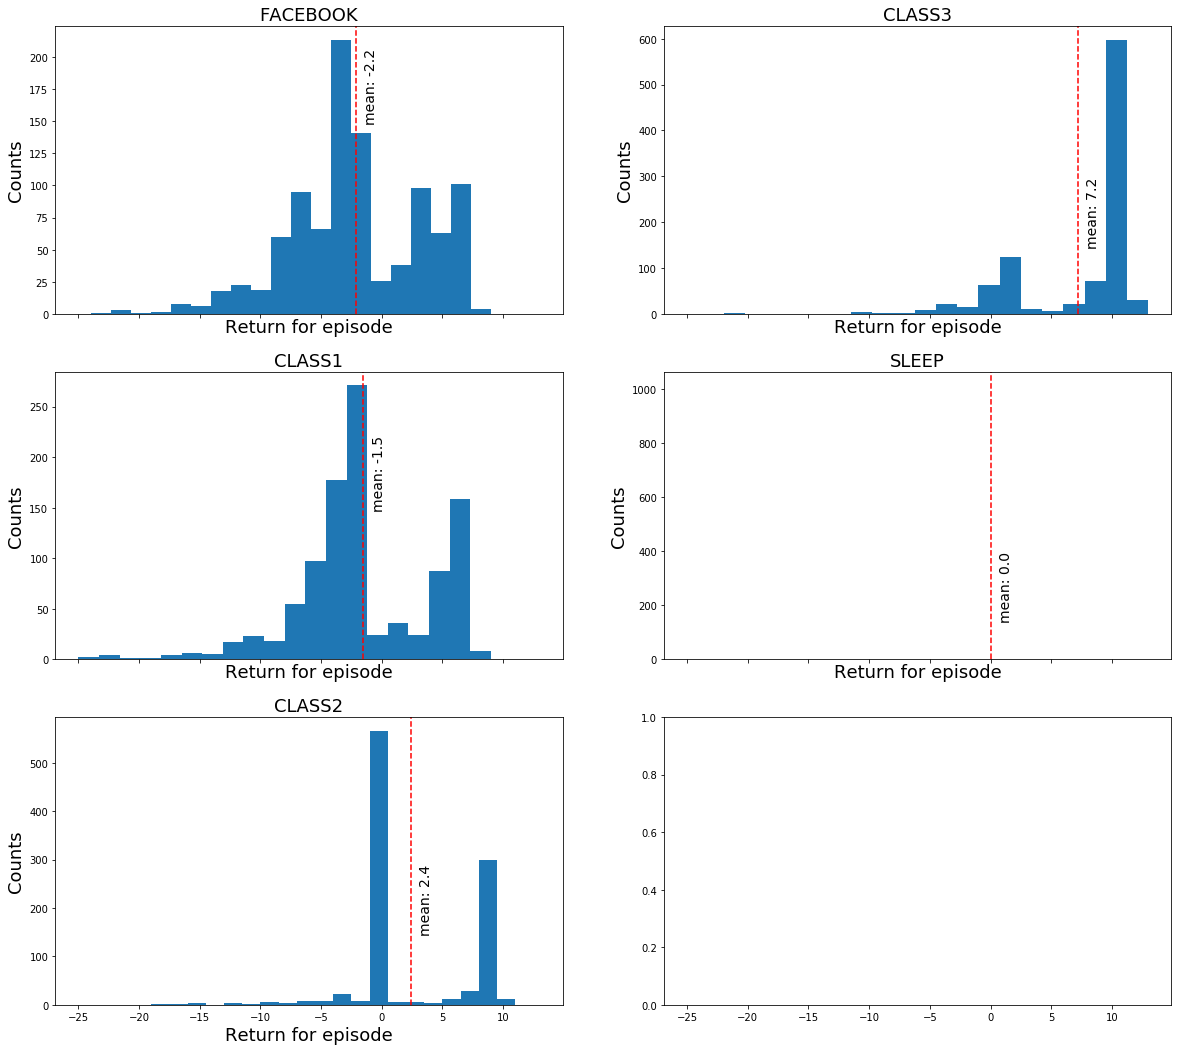

In [6]:
nrow = 3
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, figsize=(20,18))

for start_state in range(len(obs)):
    x = start_state % nrow
    y = start_state // nrow
    avg_reward = np.mean(rewards[start_state])
    axs[x,y].hist(rewards[start_state], bins=20)
    axs[x,y].set_title(obs[start_state], fontsize=18)
    axs[x,y].axvline(x=avg_reward, color='r', linestyle='--')
    axs[x,y].text(avg_reward+0.7, 150, f"mean: {np.round(avg_reward, 1)}", rotation=90, fontsize=14)
    axs[x,y].set_xlabel('Return for episode', fontsize=18)
    axs[x,y].set_ylabel('Counts', fontsize=18)